# Assignment 2 - Redes Complejas

# Q1

In [1]:
import numpy as np

In [17]:
Adj= np.array([
    [0, 1, 1, 0, 0, 0, 0], 
    [1, 0, 1, 0, 0, 0, 0], 
    [1, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 1, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 1, 1, 0, 1], 
    [0, 0, 0, 0, 0, 1, 0]
])

Adj

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [18]:
D = np.diag(np.sum(Adj, axis=1))
L = D - Adj
L

array([[ 2, -1, -1,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0],
       [-1, -1,  3, -1,  0,  0,  0],
       [ 0,  0, -1,  3, -1, -1,  0],
       [ 0,  0,  0, -1,  2, -1,  0],
       [ 0,  0,  0, -1, -1,  3, -1],
       [ 0,  0,  0,  0,  0, -1,  1]])

In [19]:
from scipy.linalg import eig

w, v = eig(L)

idx = np.argsort(w)
w = w[idx]
v = v[:, idx]

In [23]:
fiedler_value = w[1]
fiedler_vector = v[:, 1]

print(f"The fiedler values is {fiedler_value}")
print(f"The fiedler vector is {fiedler_vector}")

The fiedler values is (0.34032095848177174+0j)
The fiedler vector is [ 0.46724728  0.46724728  0.30823323 -0.11469308 -0.27370712 -0.33957289
 -0.5147547 ]


In [25]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(range(len(Adj)))
for i in range(len(Adj)):
    for j in range(len(Adj)):
        if Adj[i][j] == 1:
            G.add_edge(i, j)

community_1 = [i for i, x in enumerate(fiedler_vector) if x >= 0]
community_2 = [i for i, x in enumerate(fiedler_vector) if x < 0]

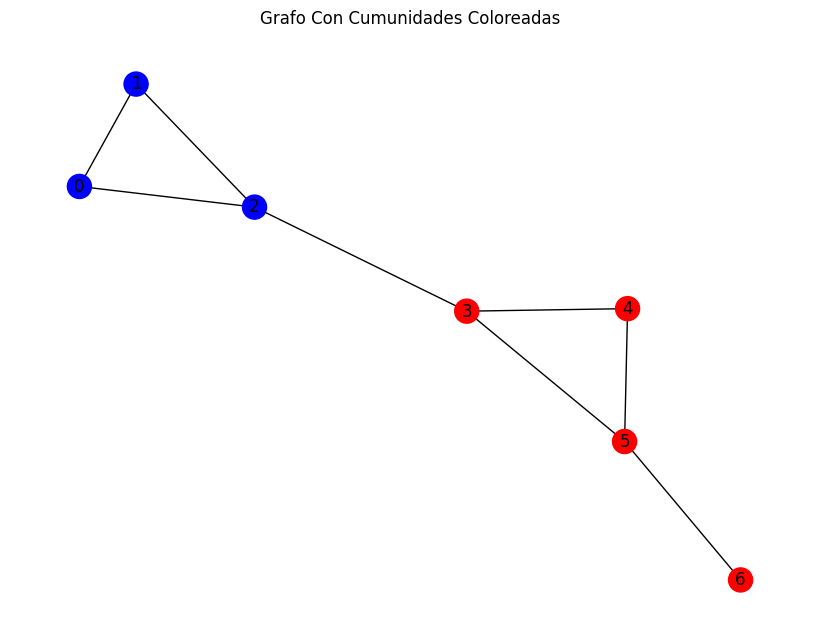

In [40]:
import matplotlib.pyplot as plt

node_colors = ['blue' if node in community_1 else 'red' for node in G.nodes()]

plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_color=node_colors, node_size=300, )
plt.title('Grafo Con Cumunidades Coloreadas')
plt.show()

# Q3

In [109]:
import networkx as nx

gnutella_graph = nx.read_pajek('data/gnutella.net')
print("Gnutella")
gnutella_graph_total_nodes, gnutella_graph_total_edges = gnutella_graph.number_of_nodes(), gnutella_graph.number_of_edges()
print("Number of nodes:", gnutella_graph_total_nodes)
print("Number of edges:", gnutella_graph_total_edges)

Gnutella
Number of nodes: 795
Number of edges: 852


In [113]:
import networkx as nx

delfines_graph = nx.read_pajek('data/delfines.net')

print("Delfines")
delfines_graph_total_nodes, delfines_graph_total_edges = delfines_graph.number_of_nodes(), delfines_graph.number_of_edges()
print("Number of nodes:", delfines_graph_total_nodes)
print("Number of edges:", delfines_graph_total_edges)

Delfines
Number of nodes: 62
Number of edges: 159


In [114]:
def giant_component_size_fn(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return len(largest_cc)

## Eliminar Componentes al azar

In [138]:
def remove_nodes_until_half_giant_component_size(gnutella_graph):
    import random

    giant_component_size = giant_component_size_fn(gnutella_graph)
    target_component_size = giant_component_size / 2

    giant_sizes = [giant_component_size]

    i = 0
    while giant_sizes[-1] > target_component_size:
        i += 1
        node_to_remove = random.choice(list(gnutella_graph.nodes))
        gnutella_graph.remove_node(node_to_remove)
        current_giant_size = giant_component_size_fn(gnutella_graph)
        giant_sizes.append(current_giant_size)
    
    return giant_sizes


### Delfines

In [198]:
deleted_nodes_number = []

for i in range(100):
    delfines = delfines_graph.copy()
    giant_sizes_delfines = remove_nodes_until_half_giant_component_size(delfines)
    deleted_nodes_number.append(len(giant_sizes_delfines))

In [199]:
average_number_deleted_nodes = np.average(deleted_nodes_number)

In [200]:
print('Average number of nodes removed:', int(average_number_deleted_nodes))
print(f'Percentage of nodes removed: {(average_number_deleted_nodes / delfines_graph_total_nodes) * 100:.2f}%')

Average number of nodes removed: 25
Percentage of nodes removed: 41.82%


In [205]:
delfines = delfines_graph.copy()

delfines_giant_sizes = remove_nodes_until_half_giant_component_size(delfines)

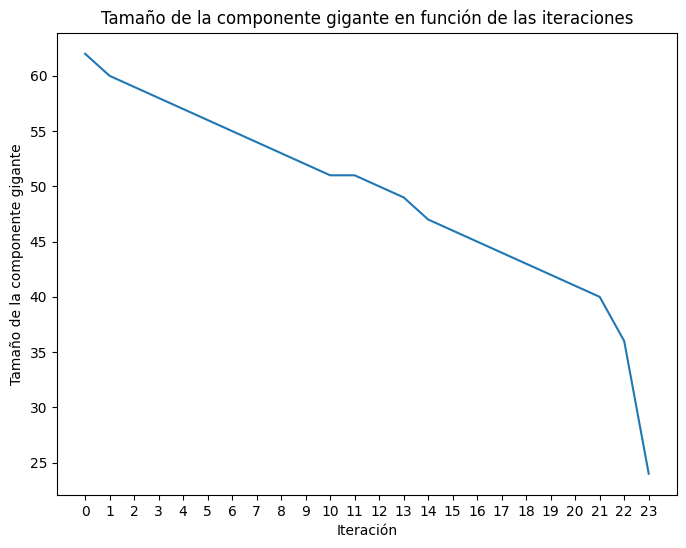

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(delfines_giant_sizes)
plt.xlabel('Iteración')
plt.ylabel('Tamaño de la componente gigante')
plt.title('Tamaño de la componente gigante en función de las iteraciones')
plt.xticks(range(0, len(delfines_giant_sizes), 1))
plt.show()

### Gnutella

In [208]:
deleted_nodes_number = []

for i in range(100):
    gnutella = gnutella_graph.copy()
    giant_sizes_gnutella = remove_nodes_until_half_giant_component_size(gnutella)
    deleted_nodes_number.append(len(giant_sizes_gnutella))

average_number_deleted_nodes = np.average(deleted_nodes_number) 

In [209]:
print('Average number of nodes removed:', int(average_number_deleted_nodes))
print(f'Percentage of nodes removed: {(average_number_deleted_nodes / gnutella_graph_total_nodes) * 100:.2f}%')

Average number of nodes removed: 265
Percentage of nodes removed: 33.34%


In [146]:
gnutella = gnutella_graph.copy()

giant_sizes_gnutella = remove_nodes_until_half_giant_component_size(gnutella)

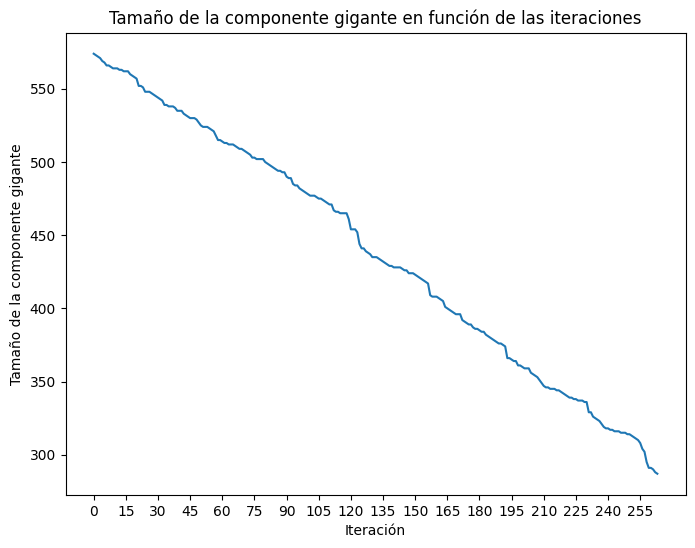

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(giant_sizes_gnutella)
plt.xlabel('Iteración')
plt.ylabel('Tamaño de la componente gigante')
plt.title('Tamaño de la componente gigante en función de las iteraciones')
plt.xticks(range(0, len(giant_sizes_gnutella), 15))
plt.show()

## Eliminando nodos en orden de grado decreciente

In [167]:
def remove_degree_nodes_until_half_giant_component_size(gnutella_graph):
    giant_component_size = giant_component_size_fn(gnutella_graph)
    target_component_size = giant_component_size / 2

    giant_sizes = [giant_component_size]

    i = 0
    while giant_sizes[-1] > target_component_size:
        i += 1
        node_to_remove = max(gnutella_graph.degree, key=lambda x: x[1])[0]
        gnutella_graph.remove_node(node_to_remove)
        current_giant_size = giant_component_size_fn(gnutella_graph)
        giant_sizes.append(current_giant_size)
    
    return giant_sizes

### Delfines

In [247]:
delfines = delfines_graph.copy()
giant_sizes_delfines = remove_degree_nodes_until_half_giant_component_size(delfines)
deleted_nodes_number = len(giant_sizes_delfines)

In [248]:
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / delfines_graph_total_nodes) * 100:.2f}%')

Number of nodes removed: 16
Percentage of nodes removed: 25.81%


In [249]:
delfines = delfines_graph.copy()

delfines_giant_sizes = remove_degree_nodes_until_half_giant_component_size(delfines)

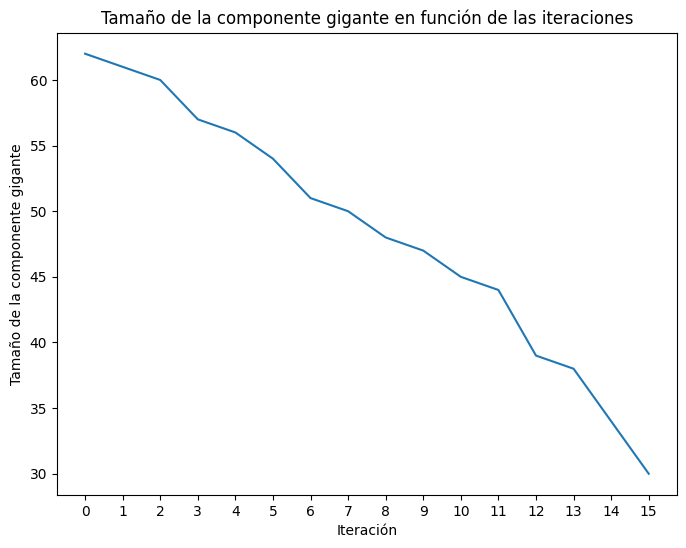

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(delfines_giant_sizes)
plt.xlabel('Iteración')
plt.ylabel('Tamaño de la componente gigante')
plt.title('Tamaño de la componente gigante en función de las iteraciones')
plt.xticks(range(0, len(delfines_giant_sizes), 1))
plt.show()

### Gnutella

In [236]:
gnutella = gnutella_graph.copy()
giant_sizes_gnutella = remove_degree_nodes_until_half_giant_component_size(gnutella)
deleted_nodes_number = len(giant_sizes_gnutella)

In [238]:
print('Number of nodes removed:', deleted_nodes_number)
print(f'Percentage of nodes removed: {(deleted_nodes_number / gnutella_graph_total_nodes) * 100:.2f}%')

Number of nodes removed: 25
Percentage of nodes removed: 3.14%


In [239]:
gnutella = gnutella_graph.copy()

giant_sizes_gnutella = remove_degree_nodes_until_half_giant_component_size(gnutella)

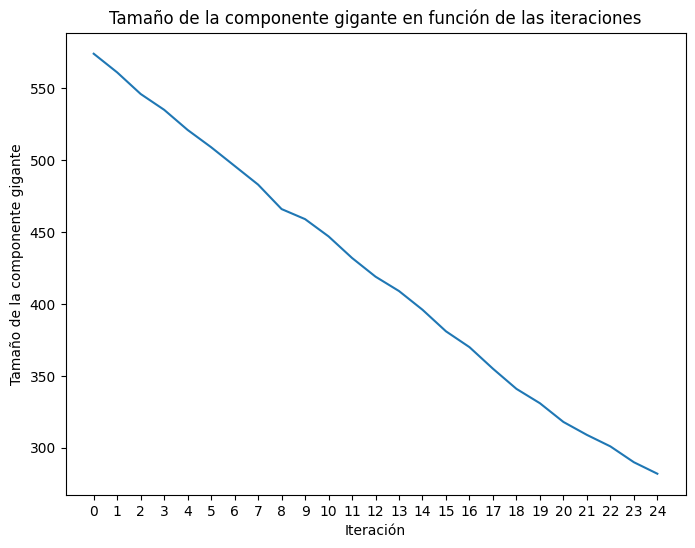

In [240]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(giant_sizes_gnutella)
plt.xlabel('Iteración')
plt.ylabel('Tamaño de la componente gigante')
plt.title('Tamaño de la componente gigante en función de las iteraciones')
plt.xticks(range(0, len(giant_sizes_gnutella), 1))
plt.show()

## Eliminando nodos en orden de betweenness decreciente

In [221]:
def remove_betweenness_nodes_until_half_giant_component_size(gnutella_graph):
    giant_component_size = giant_component_size_fn(gnutella_graph)
    target_component_size = giant_component_size / 2

    giant_sizes = [giant_component_size]

    i = 0
    while giant_sizes[-1] > target_component_size:
        i += 1
        node_to_remove = max(nx.betweenness_centrality(gnutella_graph).items(), key=lambda x: x[1])[0]
        gnutella_graph.remove_node(node_to_remove)
        current_giant_size = giant_component_size_fn(gnutella_graph)
        giant_sizes.append(current_giant_size)
    
    return giant_sizes

### Delfines

In [232]:
delfines = delfines_graph.copy()
giant_sizes_delfines = remove_betweenness_nodes_until_half_giant_component_size(delfines)
deleted_nodes_number = len(giant_sizes_delfines)

In [233]:
print('Average number of nodes removed:', int(average_number_deleted_nodes))
print(f'Percentage of nodes removed: {(deleted_nodes_number / delfines_graph_total_nodes) * 100:.2f}%')

Average number of nodes removed: 9
Percentage of nodes removed: 14.52%


In [234]:
delfines = delfines.copy()

giant_sizes_gnutella = remove_betweenness_nodes_until_half_giant_component_size(gnutella)

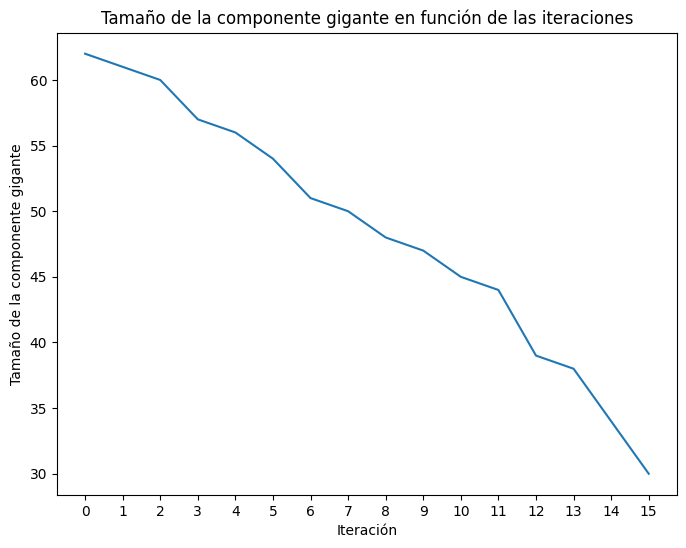

In [235]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(delfines_giant_sizes)
plt.xlabel('Iteración')
plt.ylabel('Tamaño de la componente gigante')
plt.title('Tamaño de la componente gigante en función de las iteraciones')
plt.xticks(range(0, len(delfines_giant_sizes), 1))
plt.show()

### Gnutella

In [251]:
gnutella = gnutella_graph.copy()
giant_sizes_gnutella = remove_betweenness_nodes_until_half_giant_component_size(gnutella)
deleted_nodes_number = len(giant_sizes_gnutella)

In [252]:
print('Number of nodes removed:', deleted_nodes_number)
print(f'Percentage of nodes removed: {(deleted_nodes_number / gnutella_graph_total_nodes) * 100:.2f}%')

Number of nodes removed: 26
Percentage of nodes removed: 3.27%


In [253]:
gnutella = gnutella_graph.copy()

giant_sizes_gnutella = remove_betweenness_nodes_until_half_giant_component_size(gnutella)

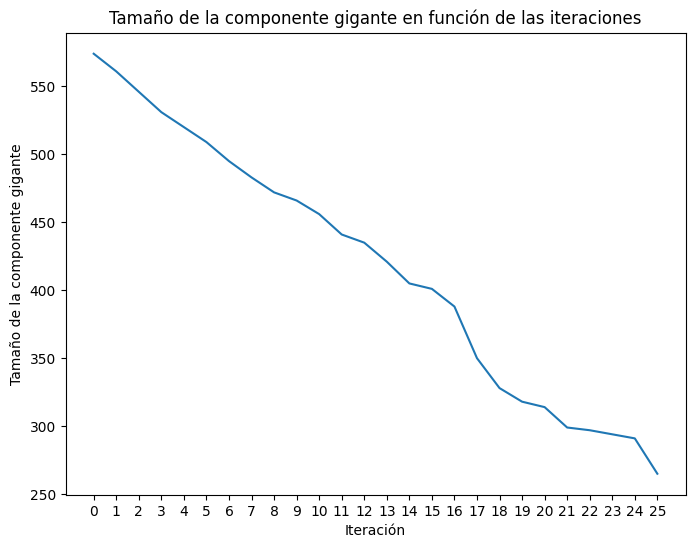

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(giant_sizes_gnutella)
plt.xlabel('Iteración')
plt.ylabel('Tamaño de la componente gigante')
plt.title('Tamaño de la componente gigante en función de las iteraciones')
plt.xticks(range(0, len(giant_sizes_gnutella), 1))
plt.show()